In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


In [24]:
# dimensions of our images.
img_width, img_height = 224, 224

In [25]:
train_data_dir = 'cats-and-dogs/train'
validation_data_dir = 'cats-and-dogs/test'
nb_train_samples = 40
nb_validation_samples = 10
epochs = 4
batch_size = 4

In [26]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [27]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [28]:
model.compile(loss='binary_crossentropy', # or categorical_crossentropy
              optimizer='rmsprop',# or adagrad
              metrics=['accuracy'])

In [29]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [30]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(train_generator.class_indices)

Found 40 images belonging to 2 classes.
{'cat': 0, 'dog': 1}


In [32]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 10 images belonging to 2 classes.


In [33]:
import scipy.ndimage
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples ,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples )

Epoch 1/4
40/40 [==============================] - 174s 4s/step - loss: 0.7105 - acc: 0.5250 - val_loss: 0.6630 - val_acc: 0.5000
Epoch 2/4
40/40 [==============================] - 12s 298ms/step - loss: 0.7065 - acc: 0.6125 - val_loss: 0.6184 - val_acc: 0.5882
Epoch 3/4
40/40 [==============================] - 14s 352ms/step - loss: 0.7136 - acc: 0.6313 - val_loss: 0.6078 - val_acc: 0.7188
Epoch 4/4
40/40 [==============================] - 12s 288ms/step - loss: 0.5412 - acc: 0.7312 - val_loss: 0.6506 - val_acc: 0.7059


In [34]:
model.save('model.h5')

In [35]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [36]:
# dimensions of our images
img_width, img_height = 224, 224

In [37]:
# load the model we saved
#model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
mypath = "cats-and-dogs/test/dog/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)
# predicting images
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(mypath+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

['2.jpg', '23.jpg', '27.jpg', '3.jpg', '4.jpg']
2.jpg: dog
23.jpg: cat
27.jpg: dog
3.jpg: cat
4.jpg: dog
Total Dogs : 3
Total Cats : 2


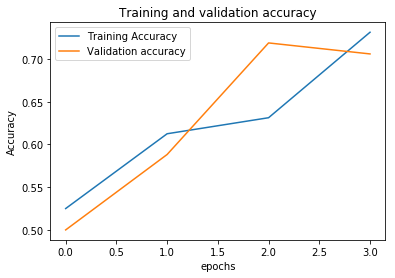

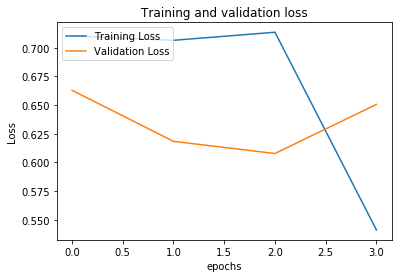

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc="upper left")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.figure()

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc="upper left")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.figure()


In [44]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred=model.predict_generator(validation_generator)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes,y_pred))
print('Classification Report')
target_names=['Cats','Dogs']
print(classification_report(validation_generator.classes,y_pred,target_names=target_names))

Confusion Matrix
[[5 0]
 [5 0]]
Classification Report
             precision    recall  f1-score   support

       Cats       0.50      1.00      0.67         5
       Dogs       0.00      0.00      0.00         5

avg / total       0.25      0.50      0.33        10



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
